# AI ODYSSSEY: CNN ASSIGNMENT

## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### FILTERS

Filters are the most unique part of a CNN. They make the bulk of the convolutional layers of a CNN, and thus differentiate it from a normal neural network.

**Describe the following filters:**
- averaging filter:
- gaussian filter:
- median filter:
- unsharp masking:
- prewitt filter:
- sobel filter:
- laplacian filter:

**Now give an example of application of each of these filters. You are required to load an image of your choice. Then, apply these filters to those images and display the image before and after convolution.**


**Averaging Filter**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
image = Image.open('/content/Screenshot 2024-06-17 224823.png')

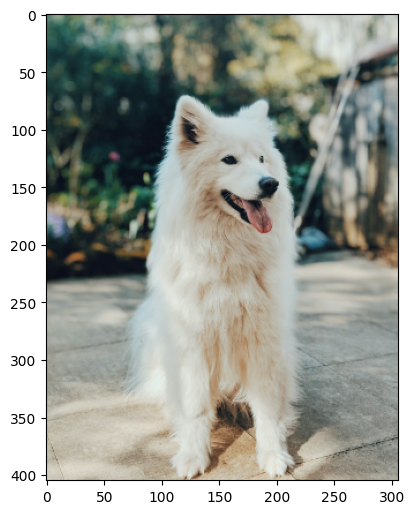

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 4)
plt.grid(False)
plt.imshow(image)


In [ ]:
import numpy as np

def average_filter(image, kernel_size):

  image_np = np.array(image)


  padding = kernel_size // 2

  filtered_image = np.zeros_like(image_np)


  for i in range(image_np.shape[0]):
    for j in range(image_np.shape[1]):

      neighborhood = image_np[i:i+kernel_size, j:j+kernel_size]

      filtered_image[i, j] = np.mean(neighborhood)

  return filtered_image

filtered_image = average_filter(image, kernel_size=3)

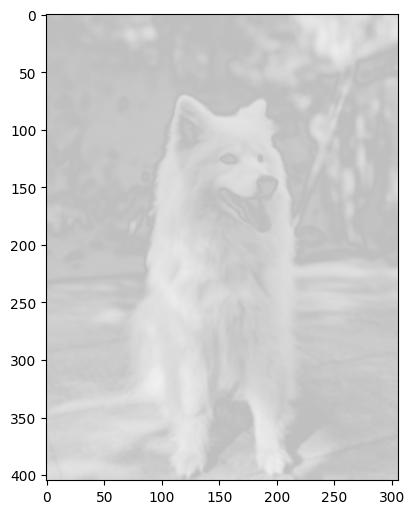

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 4)
plt.grid(False)
plt.imshow(filtered_image)


**Gaussian Filter**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
import numpy as np

def gaussian_filter(image, kernel_size, sigma):



  image_np = np.array(image)

  if kernel_size % 2 == 0:
    raise ValueError("Kernel size must be an odd number.")


  x, y = np.mgrid[-kernel_size//2 + 1:kernel_size//2 + 1, -kernel_size//2 + 1:kernel_size//2 + 1]
  gaussian_kernel = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
  gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()


  padding = kernel_size // 2
  filtered_image = np.zeros_like(image_np)
  for i in range(image_np.shape[0] - kernel_size + 1):
    for j in range(image_np.shape[1] - kernel_size + 1):

      neighborhood = image_np[i:i+kernel_size, j:j+kernel_size]

      for c in range(neighborhood.shape[2]):
        filtered_image[i + padding, j + padding, c] = np.sum(neighborhood[:, :, c] * gaussian_kernel) # Apply filter to each channel and place result in center of neighborhood

  return filtered_image
filtered_image = gaussian_filter(image, kernel_size=5, sigma=1.5)

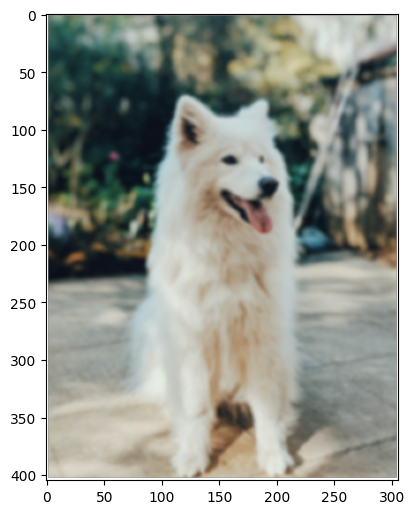

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 4)
plt.grid(False)
plt.imshow(filtered_image)


**Median Filter**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
import numpy as np

def median_filter(image, kernel_size):

  image_np = np.array(image)

  if kernel_size % 2 == 0:
    raise ValueError("Kernel size must be an odd number.")
  padding = kernel_size // 2
  filtered_image = np.zeros_like(image_np)
  for i in range(padding, image_np.shape[0] - padding):
    for j in range(padding, image_np.shape[1] - padding):

      neighborhood = image_np[i - padding: i + padding + 1, j - padding: j + padding + 1]
      for c in range(neighborhood.shape[2]):
        filtered_image[i, j, c] = np.median(neighborhood[:, :, c])

  return filtered_image
filtered_image = median_filter(image, kernel_size=3)

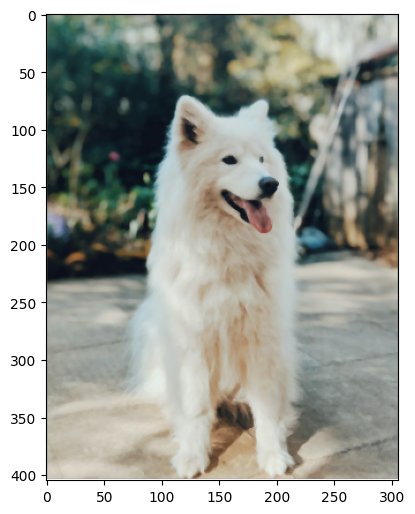

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 4)
plt.grid(False)
plt.imshow(filtered_image)


The nice images were for fun.

**Blurring is actually used for noise removal. Demonstrate.**

In [ ]:
#ENTER YOUR CODE HERE

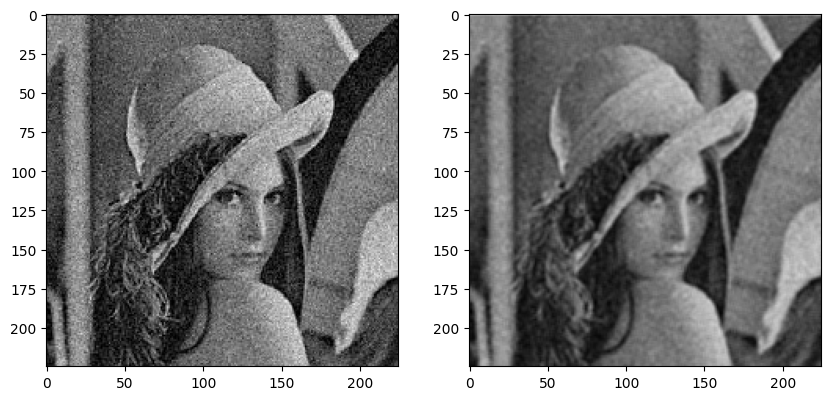

In [ ]:
!pip install opencv-python
import cv2

def gaussian_blur(image, kernel_size, sigma):
  image_cv = np.array(image)
  image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)
  blurred_image_cv = cv2.GaussianBlur(image_cv, kernel_size, sigma)
  blurred_image = cv2.cvtColor(blurred_image_cv, cv2.COLOR_BGR2RGB)
  blurred_image = Image.fromarray(blurred_image)

  return blurred_image
blurred_image = gaussian_blur(image, kernel_size=(5, 5), sigma=1.5)

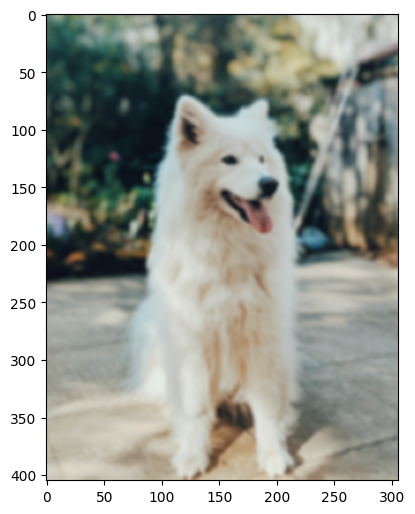

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 4)
plt.grid(False)
plt.imshow(blurred_image)


**Unsharp Masking**

In [ ]:
!pip install opencv-python
!pip install Pillow
import cv2
from PIL import Image
import numpy as np

def unsharp_masking(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
  image_cv = np.array(image)
  image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)
  blurred_image_cv = cv2.GaussianBlur(image_cv, kernel_size, sigma)
  sharpened_image_cv = cv2.addWeighted(image_cv, 1.0 + amount, blurred_image_cv, -amount, 0.0)
  if threshold > 0:
    low_contrast_mask = cv2.cvtColor(cv2.absdiff(image_cv, blurred_image_cv), cv2.COLOR_BGR2GRAY) < threshold
    sharpened_image_cv[low_contrast_mask] = image_cv[low_contrast_mask]
  sharpened_image = cv2.cvtColor(sharpened_image_cv, cv2.COLOR_BGR2RGB)
  sharpened_image = Image.fromarray(sharpened_image)

  return sharpened_image
sharpened_image = unsharp_masking(image, amount=1.5, threshold=10)

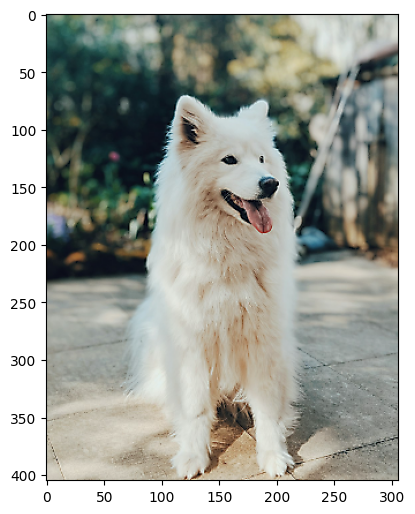

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 4)
plt.grid(False)
plt.imshow(sharpened_image)


In [ ]:
#ENTER YOUR CODE HERE

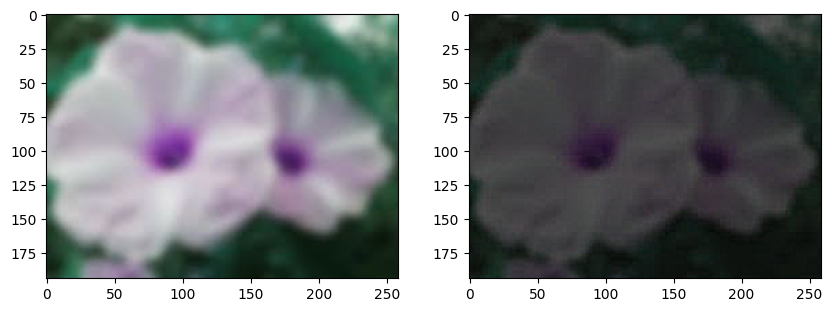

**Prewitt Horizontal Filter**

In [ ]:
#ENTER YOUR CODE HERE

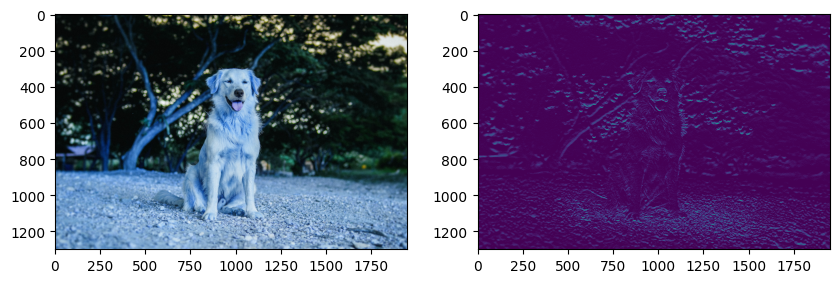

**Prewitt Vertical Filter**

In [ ]:
#ENTER YOUR CODE HERE

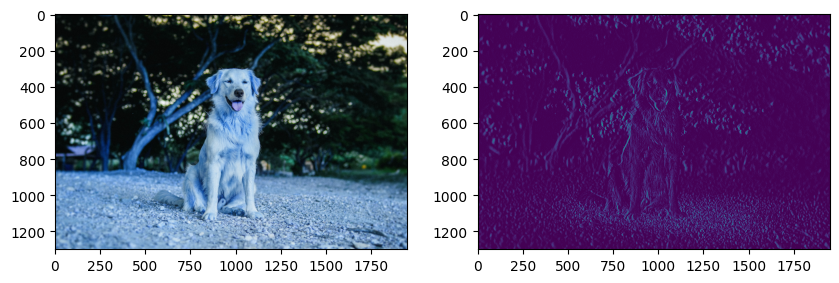

**Combined Prewitt**

In [ ]:
#ENTER YOUR CODE HERE

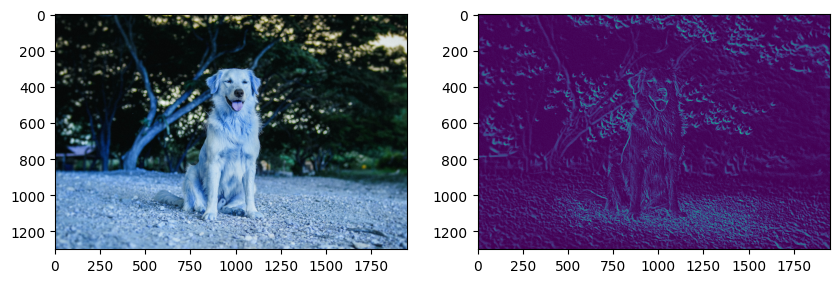

**Sobel Filter**

In [ ]:
#ENTER YOUR CODE HERE

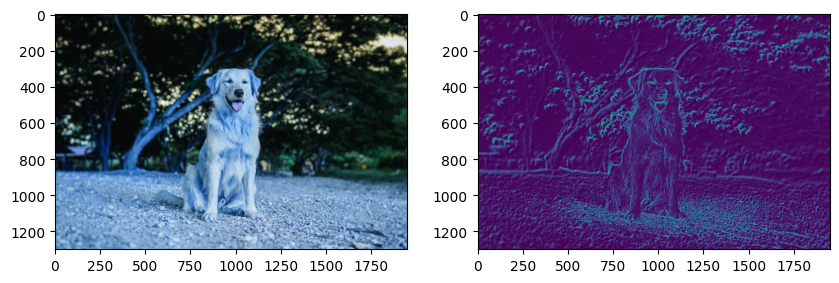

As you can see, the quality of sobel filter is better than that of combined prewitt.

**Laplacian Filter**

In [ ]:
#ENTER YOUR CODE HERE

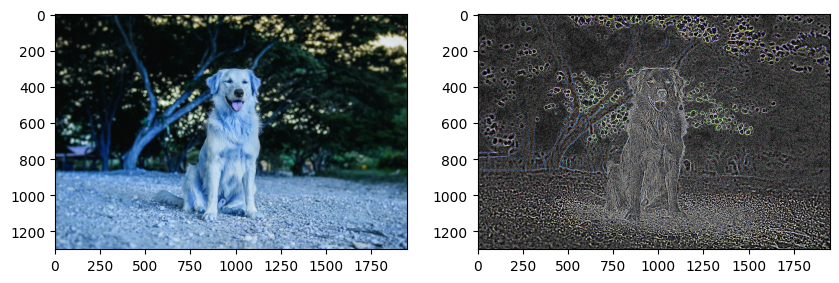

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [2]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**What is the no. of elements in the training and testing datasets?**

In [ ]:
#ENTER YOUR CODE HERE

In [8]:
print('No. of elements in training dataset:',X_train.shape[0])
print('No. of elements in testing dataset:',X_test.shape[0])

No. of elements in training dataset: 60000
No. of elements in testing dataset: 10000


**What are the labels in the dataset?**

In [ ]:
#ENTER YOUR CODE HERE

In [16]:
import numpy as np

In [17]:
print('Labels in the dataset:', np.unique(y_train))

Labels in the dataset: [0 1 2 3 4 5 6 7 8 9]


**Visualise one image for each label.**

In [ ]:
#ENTER YOUR CODE HERE

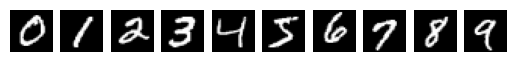

In [22]:

import matplotlib.pyplot as plt
labels = np.unique(y_train)
fig, axs = plt.subplots(1, len(labels))
for i, label in enumerate(labels):
    image_index = np.where(y_train == label)[0][0]
    axs[i].imshow(X_train[image_index], cmap='gray')
    axs[i].axis('off')
plt.show()


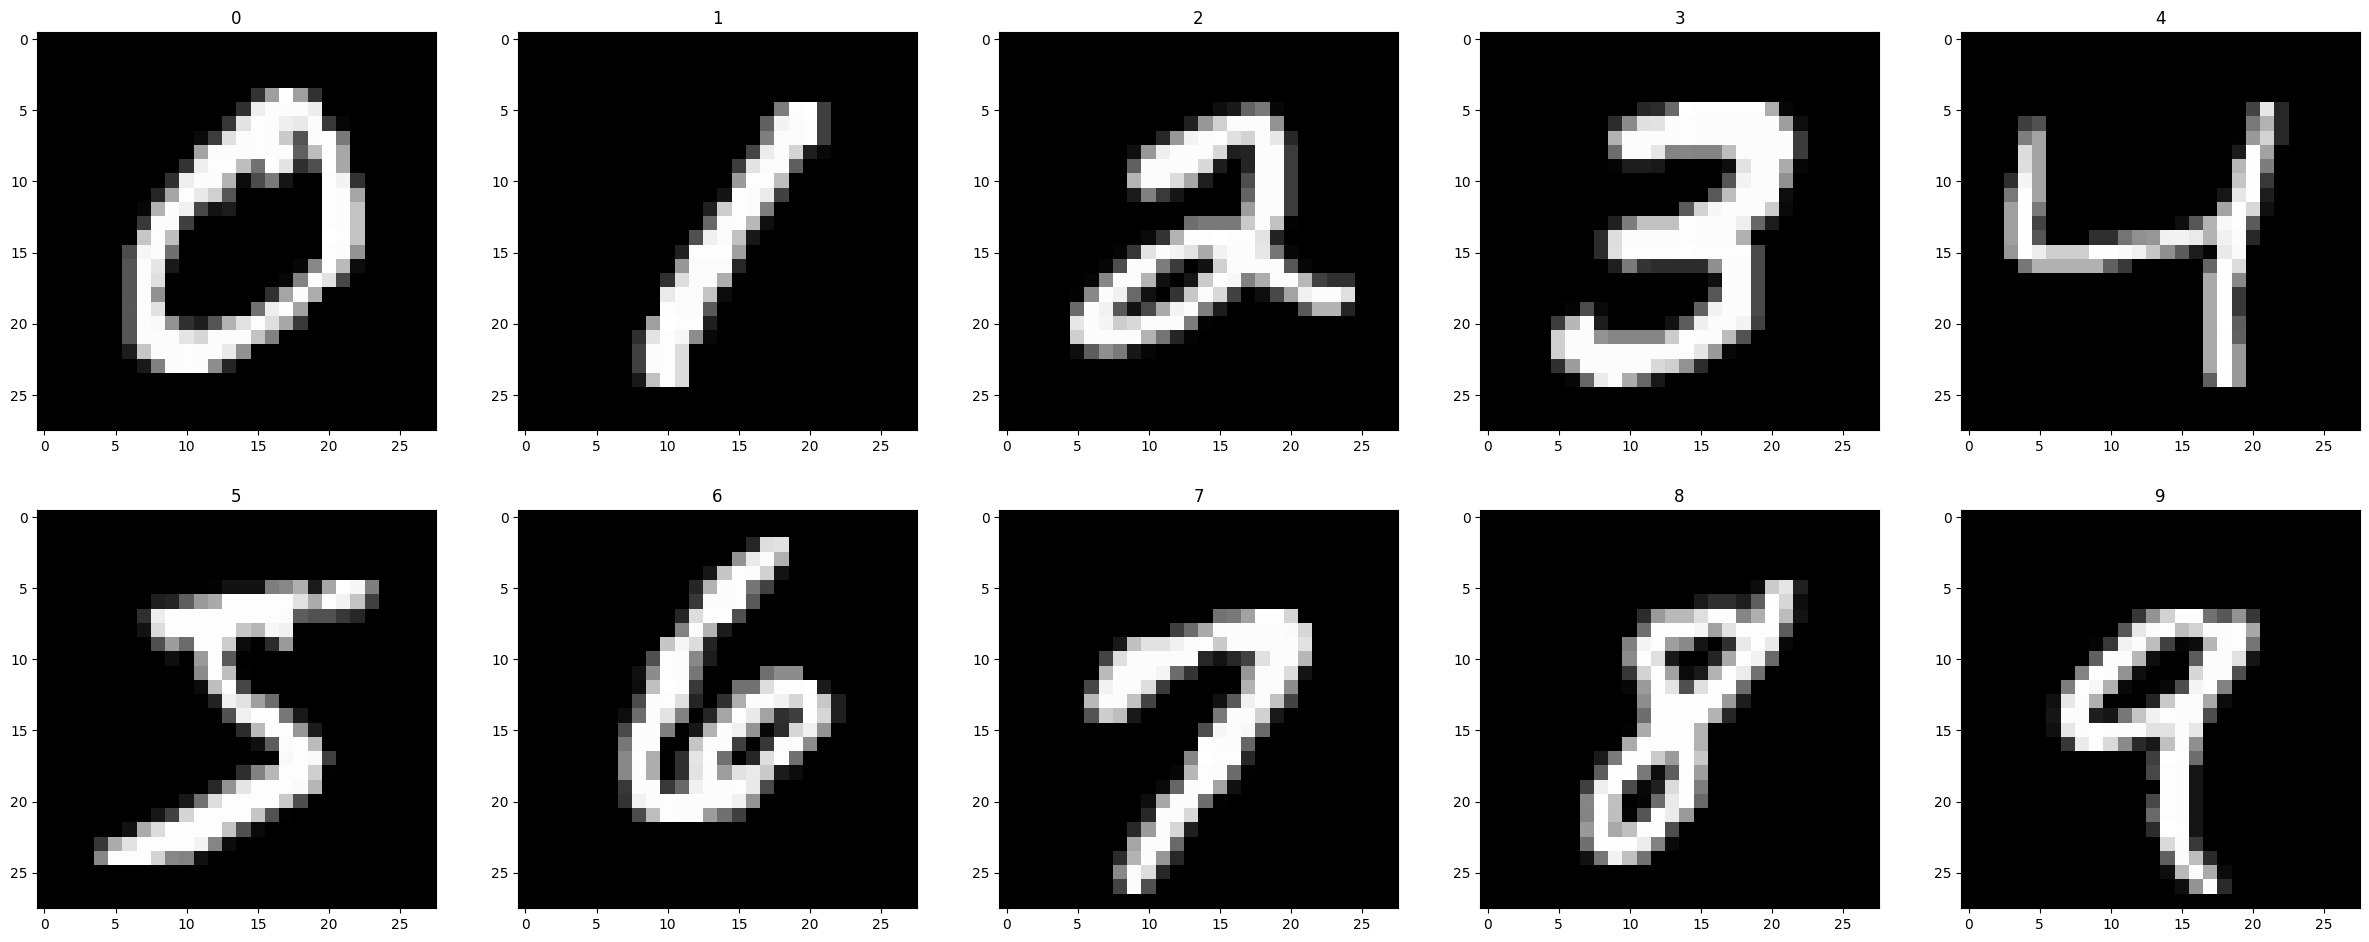

**One-hot encode the y labels.**

In [ ]:
#ENTER YOUR CODE HERE

In [24]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

In [ ]:
#ENTER YOUR CODE HERE

The shape of each element is: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0

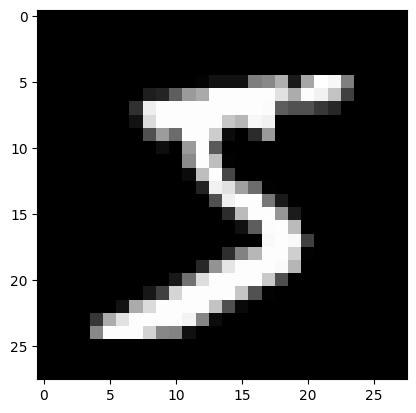

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

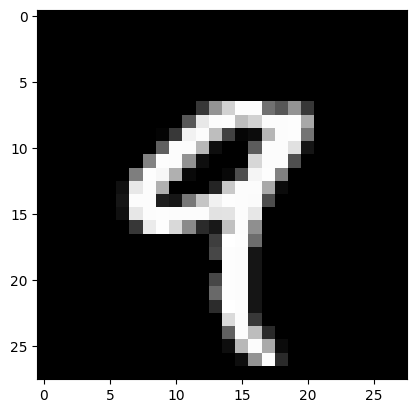

In [26]:

import matplotlib.pyplot as plt
image_index = 4
print(X_train[image_index])
plt.imshow(X_train[image_index], cmap="gray")
plt.show()


**Change the dimension of the training and testing datasets for it to become a 3D one. Remember this is a grayscale image.**

In [ ]:
#ENTER YOUR CODE HERE

In [28]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [ ]:
#ENTER YOUR CODE HERE

In [30]:

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.**

In [ ]:
#ENTER YOUR CODE HERE

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))




**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [ ]:
#ENTER YOUR CODE HERE

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Now split the dataset into a validation part.**

In [ ]:
#ENTER YOUR CODE HERE

In [48]:


from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1
)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train_cat:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val_cat:", y_val.shape)


Shape of X_train: (43740, 28, 28, 1)
Shape of y_train_cat: (43740, 10)
Shape of X_val: (4860, 28, 28, 1)
Shape of y_val_cat: (4860, 10)


**Fit the model and plot the training history.**

In [ ]:
#ENTER YOUR CODE HERE

Epoch 1/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0608 - val_accuracy: 0.9815
Epoch 2/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0514 - val_accuracy: 0.9851
Epoch 3/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0550 - val_accuracy: 0.9847
Epoch 4/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0494 - val_accuracy: 0.9862
Epoch 6/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0418 - val_accuracy: 0.9880
Epoch 7/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0377 -

In [51]:
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1367/1367 [==============================] - 34s 25ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 0.0498 - val_accuracy: 0.9862
Epoch 2/10
1367/1367 [==============================] - 36s 26ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.0534 - val_accuracy: 0.9864
Epoch 3/10
1367/1367 [==============================] - 37s 27ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0567 - val_accuracy: 0.9862
Epoch 4/10
1367/1367 [==============================] - 35s 25ms/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.0556 - val_accuracy: 0.9850
Epoch 5/10
1367/1367 [==============================] - 36s 26ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0663 - val_accuracy: 0.9837
Epoch 6/10
1367/1367 [==============================] - 36s 26ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0595 - val_accuracy: 0.9862
Epoch 7/10
1367/1367 [==============================] - 34s 25ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0603 -

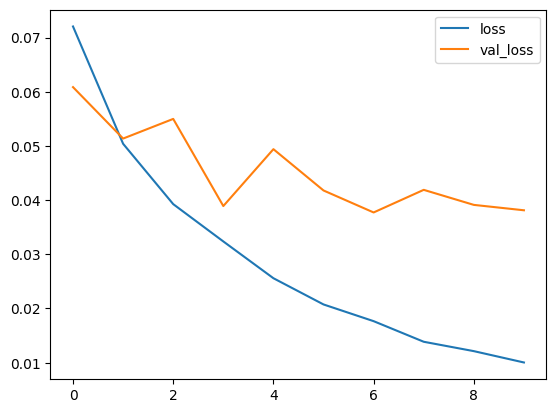

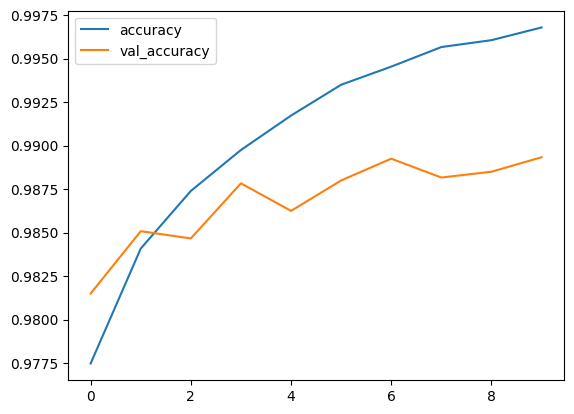

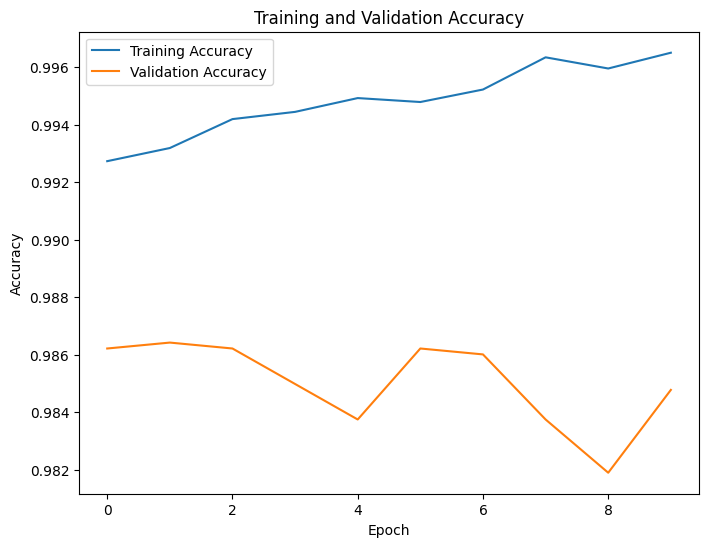

In [54]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
num_epochs = len(train_accuracy)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(num_epochs), train_accuracy, label='Training Accuracy')
ax.plot(range(num_epochs), val_accuracy, label='Validation Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy')
ax.legend()
plt.show()

**Now test your model on the training dataset and print the classification matrix.**

In [ ]:
#ENTER YOUR CODE HERE

313/313 [==============================] - 6s 19ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [55]:

from sklearn.metrics import classification_report

y_pred = model.predict(X_train)
y_true = np.argmax(y_train, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_true, y_pred_classes)
print(report)


1367/1367 [==============================] - 11s 8ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4315
           1       1.00      1.00      1.00      4953
           2       1.00      0.99      1.00      4361
           3       0.99      1.00      1.00      4434
           4       1.00      1.00      1.00      4265
           5       0.99      1.00      1.00      3944
           6       1.00      1.00      1.00      4379
           7       1.00      1.00      1.00      4481
           8       1.00      0.99      1.00      4248
           9       1.00      1.00      1.00      4360

    accuracy                           1.00     43740
   macro avg       1.00      1.00      1.00     43740
weighted avg       1.00      1.00      1.00     43740



**Lets visualise the prediction, along with the input now.**

In [ ]:
#ENTER YOUR CODE HERE

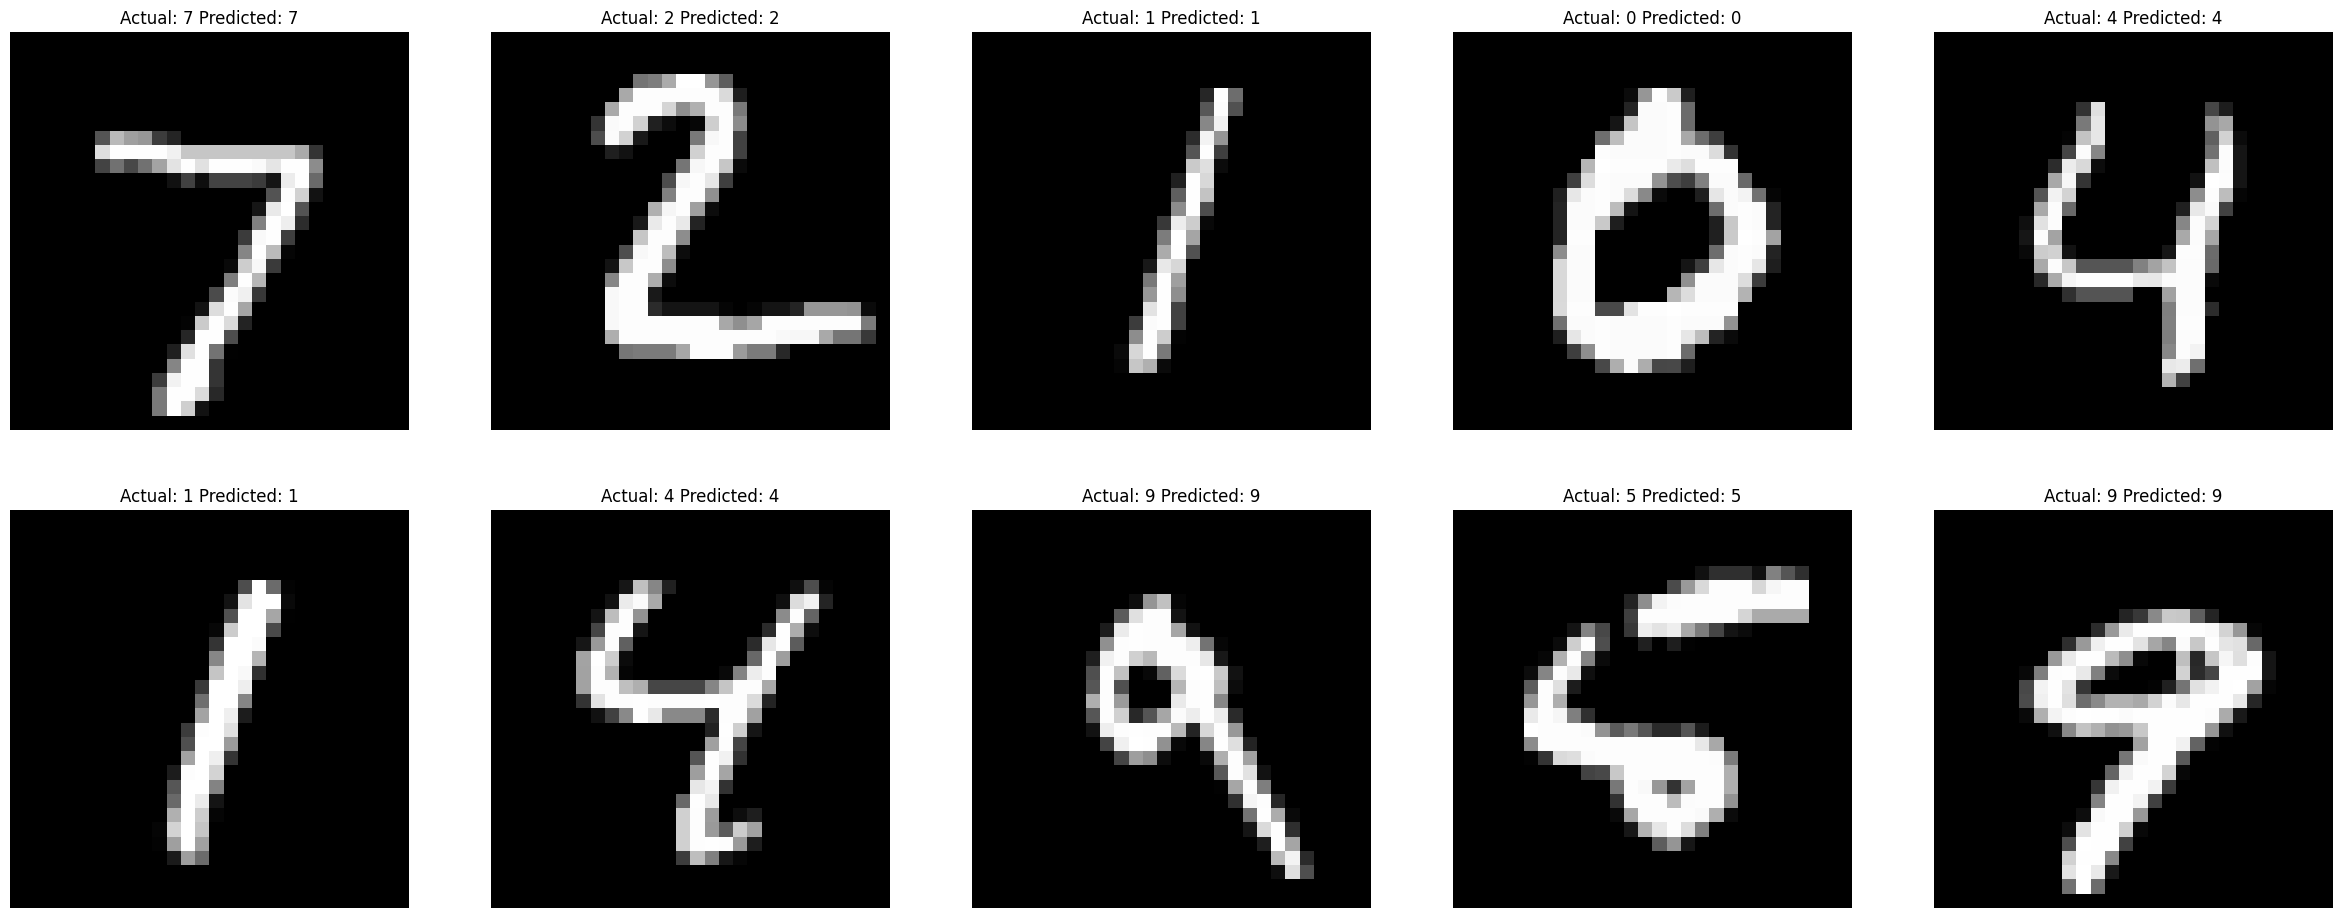

1/1 [==============================] - 0s 34ms/step
Prediction: 7
True label: 7


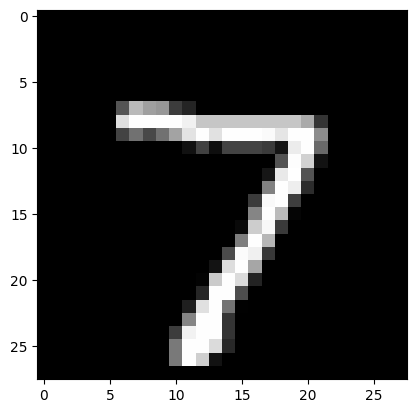

In [56]:

import matplotlib.pyplot as plt
image_index = 0

prediction = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
true_label = y_test[image_index]
print("Prediction:", np.argmax(prediction))
print("True label:", true_label)
plt.imshow(X_test[image_index].reshape(28, 28), cmap="gray")
plt.show()


**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

In [ ]:
#ENTER YOUR CODE HERE

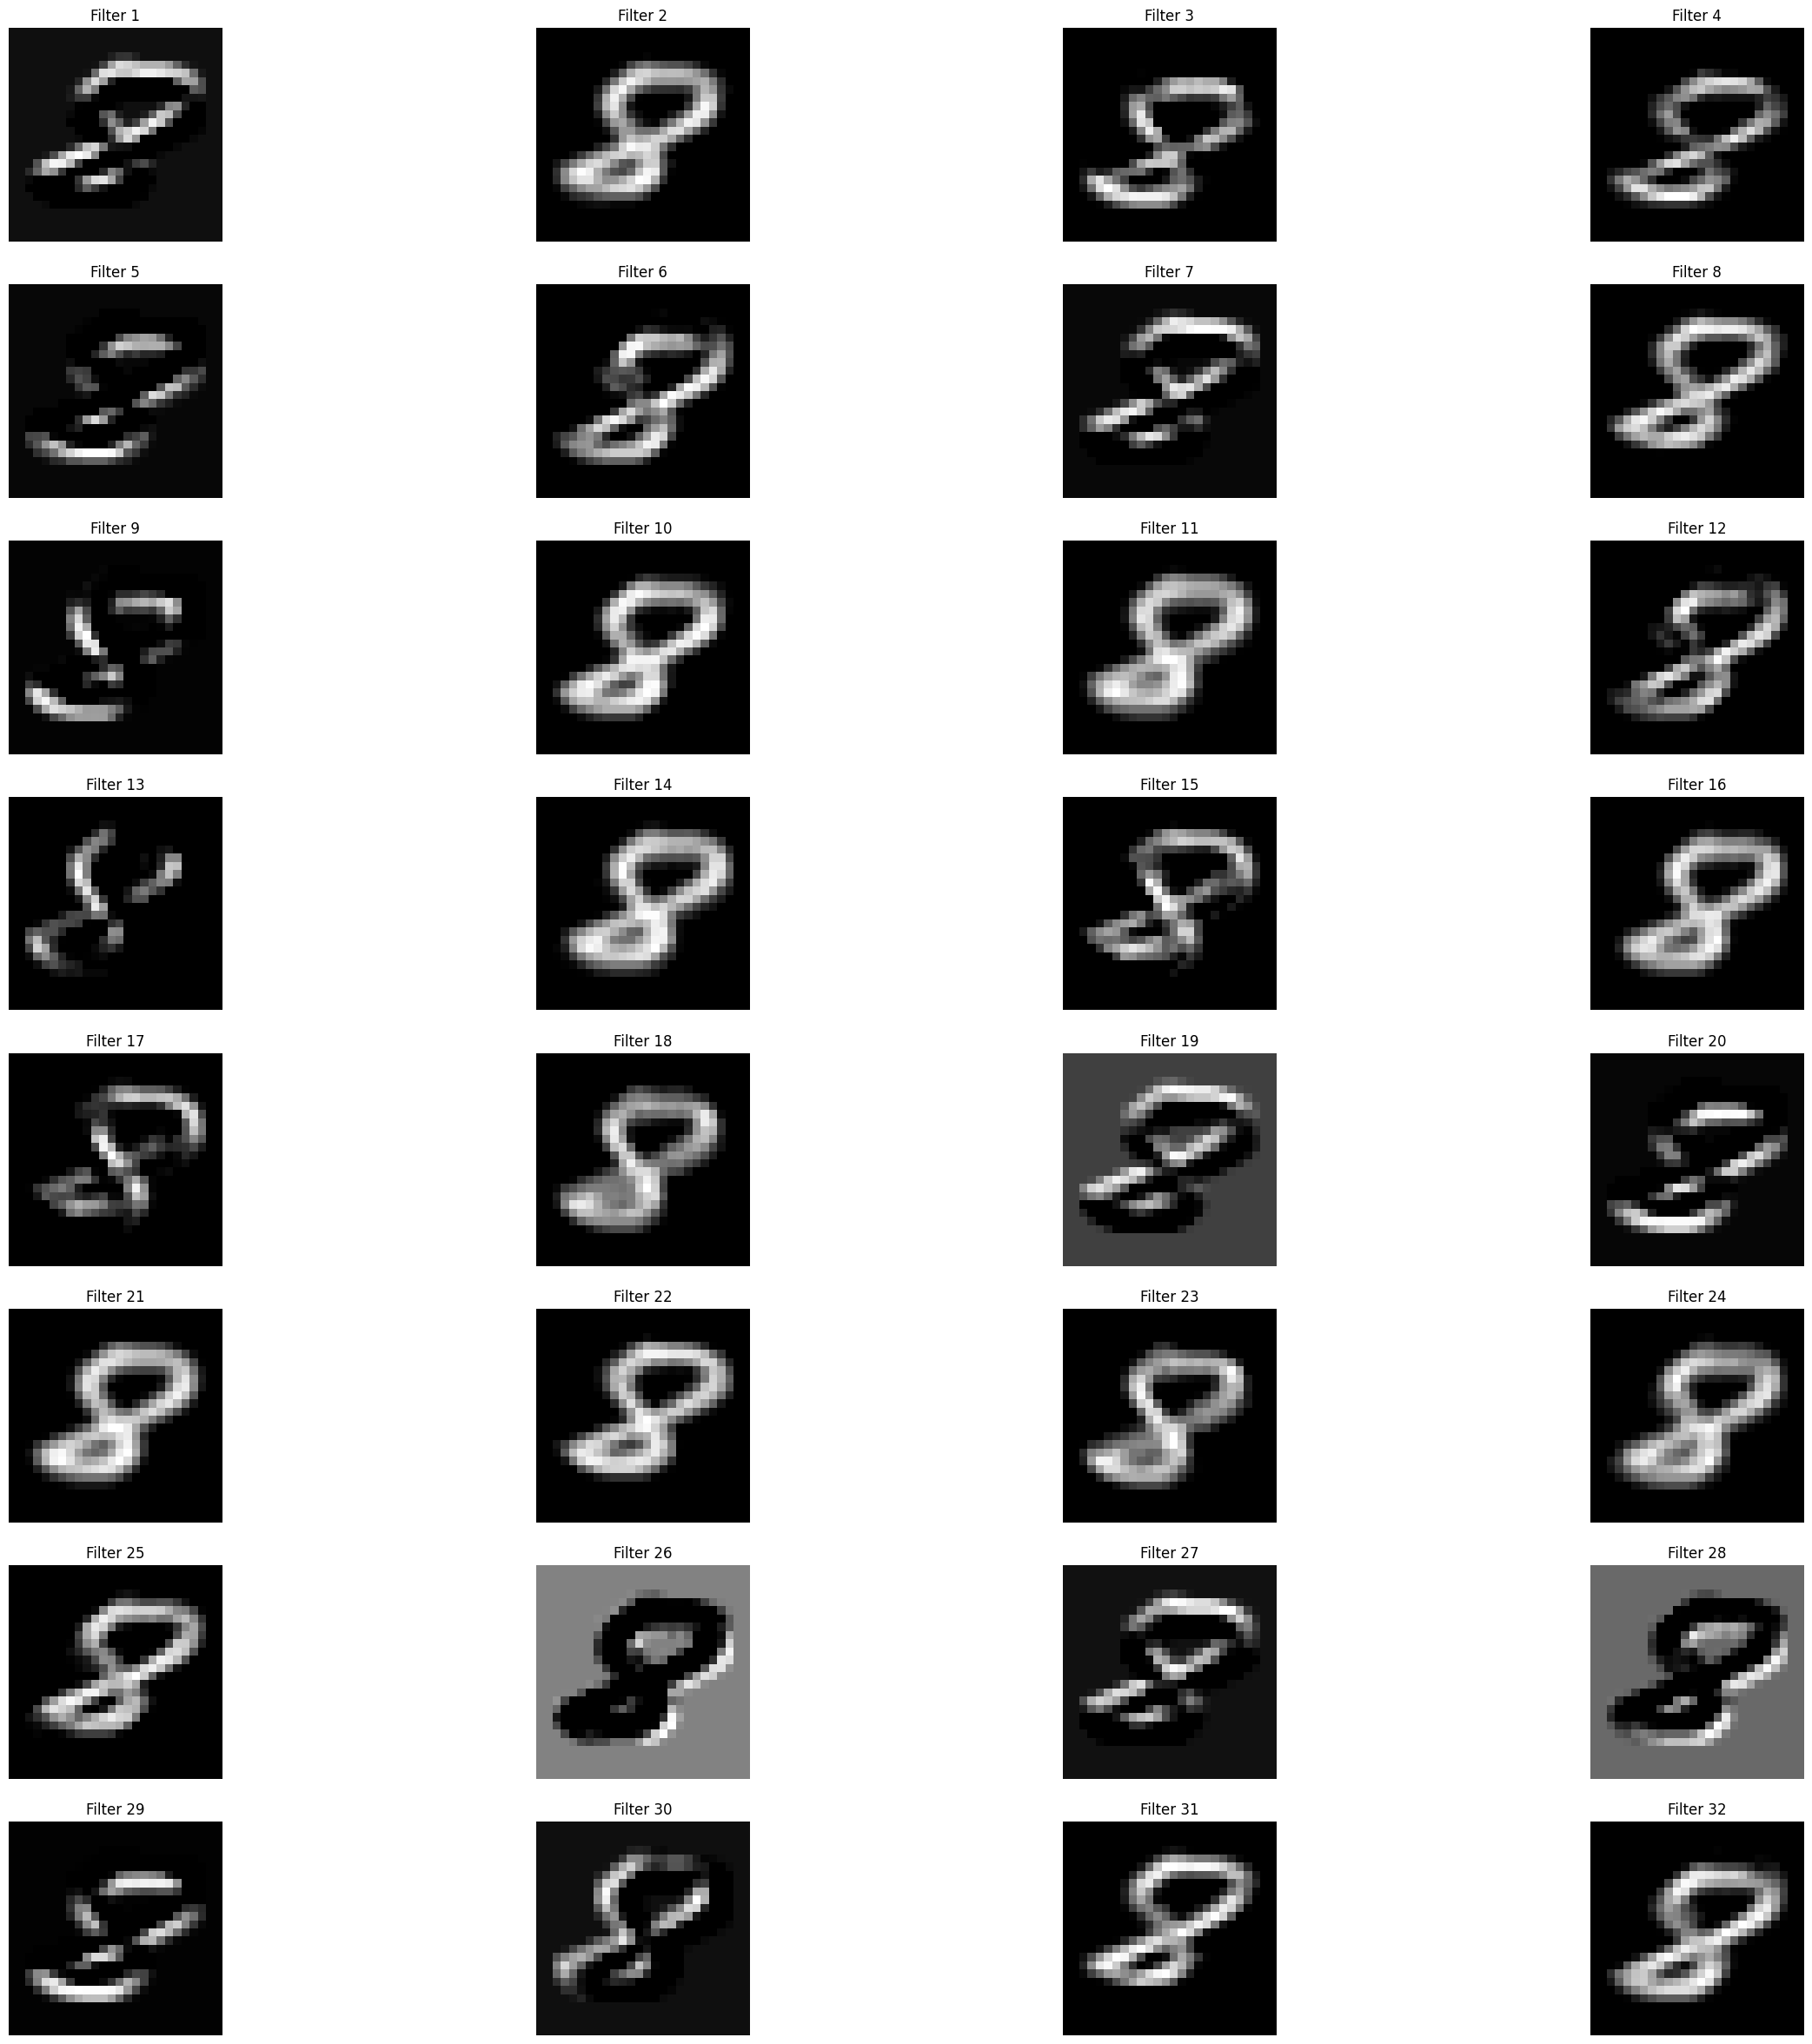

1/1 [==============================] - 0s 85ms/step


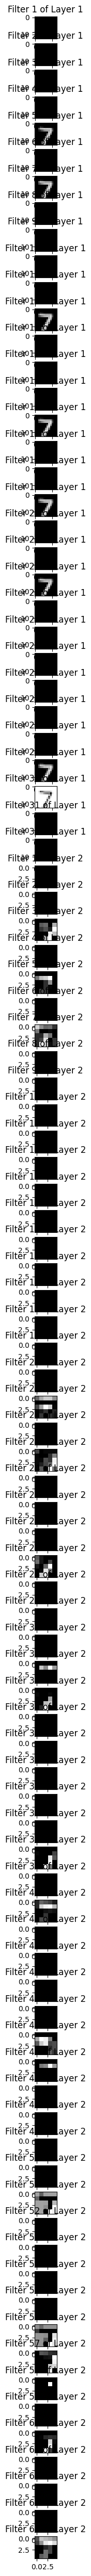

In [69]:
import tensorflow as tf
layer_1_output = model.layers[1].output
layer_2_output = model.layers[3].output
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=[layer_1_output, layer_2_output])
layer_1_output, layer_2_output = visualization_model.predict(X_test[0].reshape(1, 28, 28, 1))
num_filters_layer_1 = layer_1_output.shape[-1]
num_filters_layer_2 = layer_2_output.shape[-1]
fig, axes = plt.subplots(num_filters_layer_1 + num_filters_layer_2, 1, figsize=(32, 64))
for i in range(num_filters_layer_1):
  axes[i].imshow(layer_1_output[0, :, :, i], cmap='gray')
  axes[i].set_title(f'Filter {i+1} of Layer 1')
for i in range(num_filters_layer_2):
  axes[i + num_filters_layer_1].imshow(layer_2_output[0, :, :, i], cmap='gray')
  axes[i + num_filters_layer_1].set_title(f'Filter {i+1} of Layer 2')
plt.show()

**Do the same for the output of the max pooling layer.**

In [ ]:
#ENTER YOUR CODE HERE

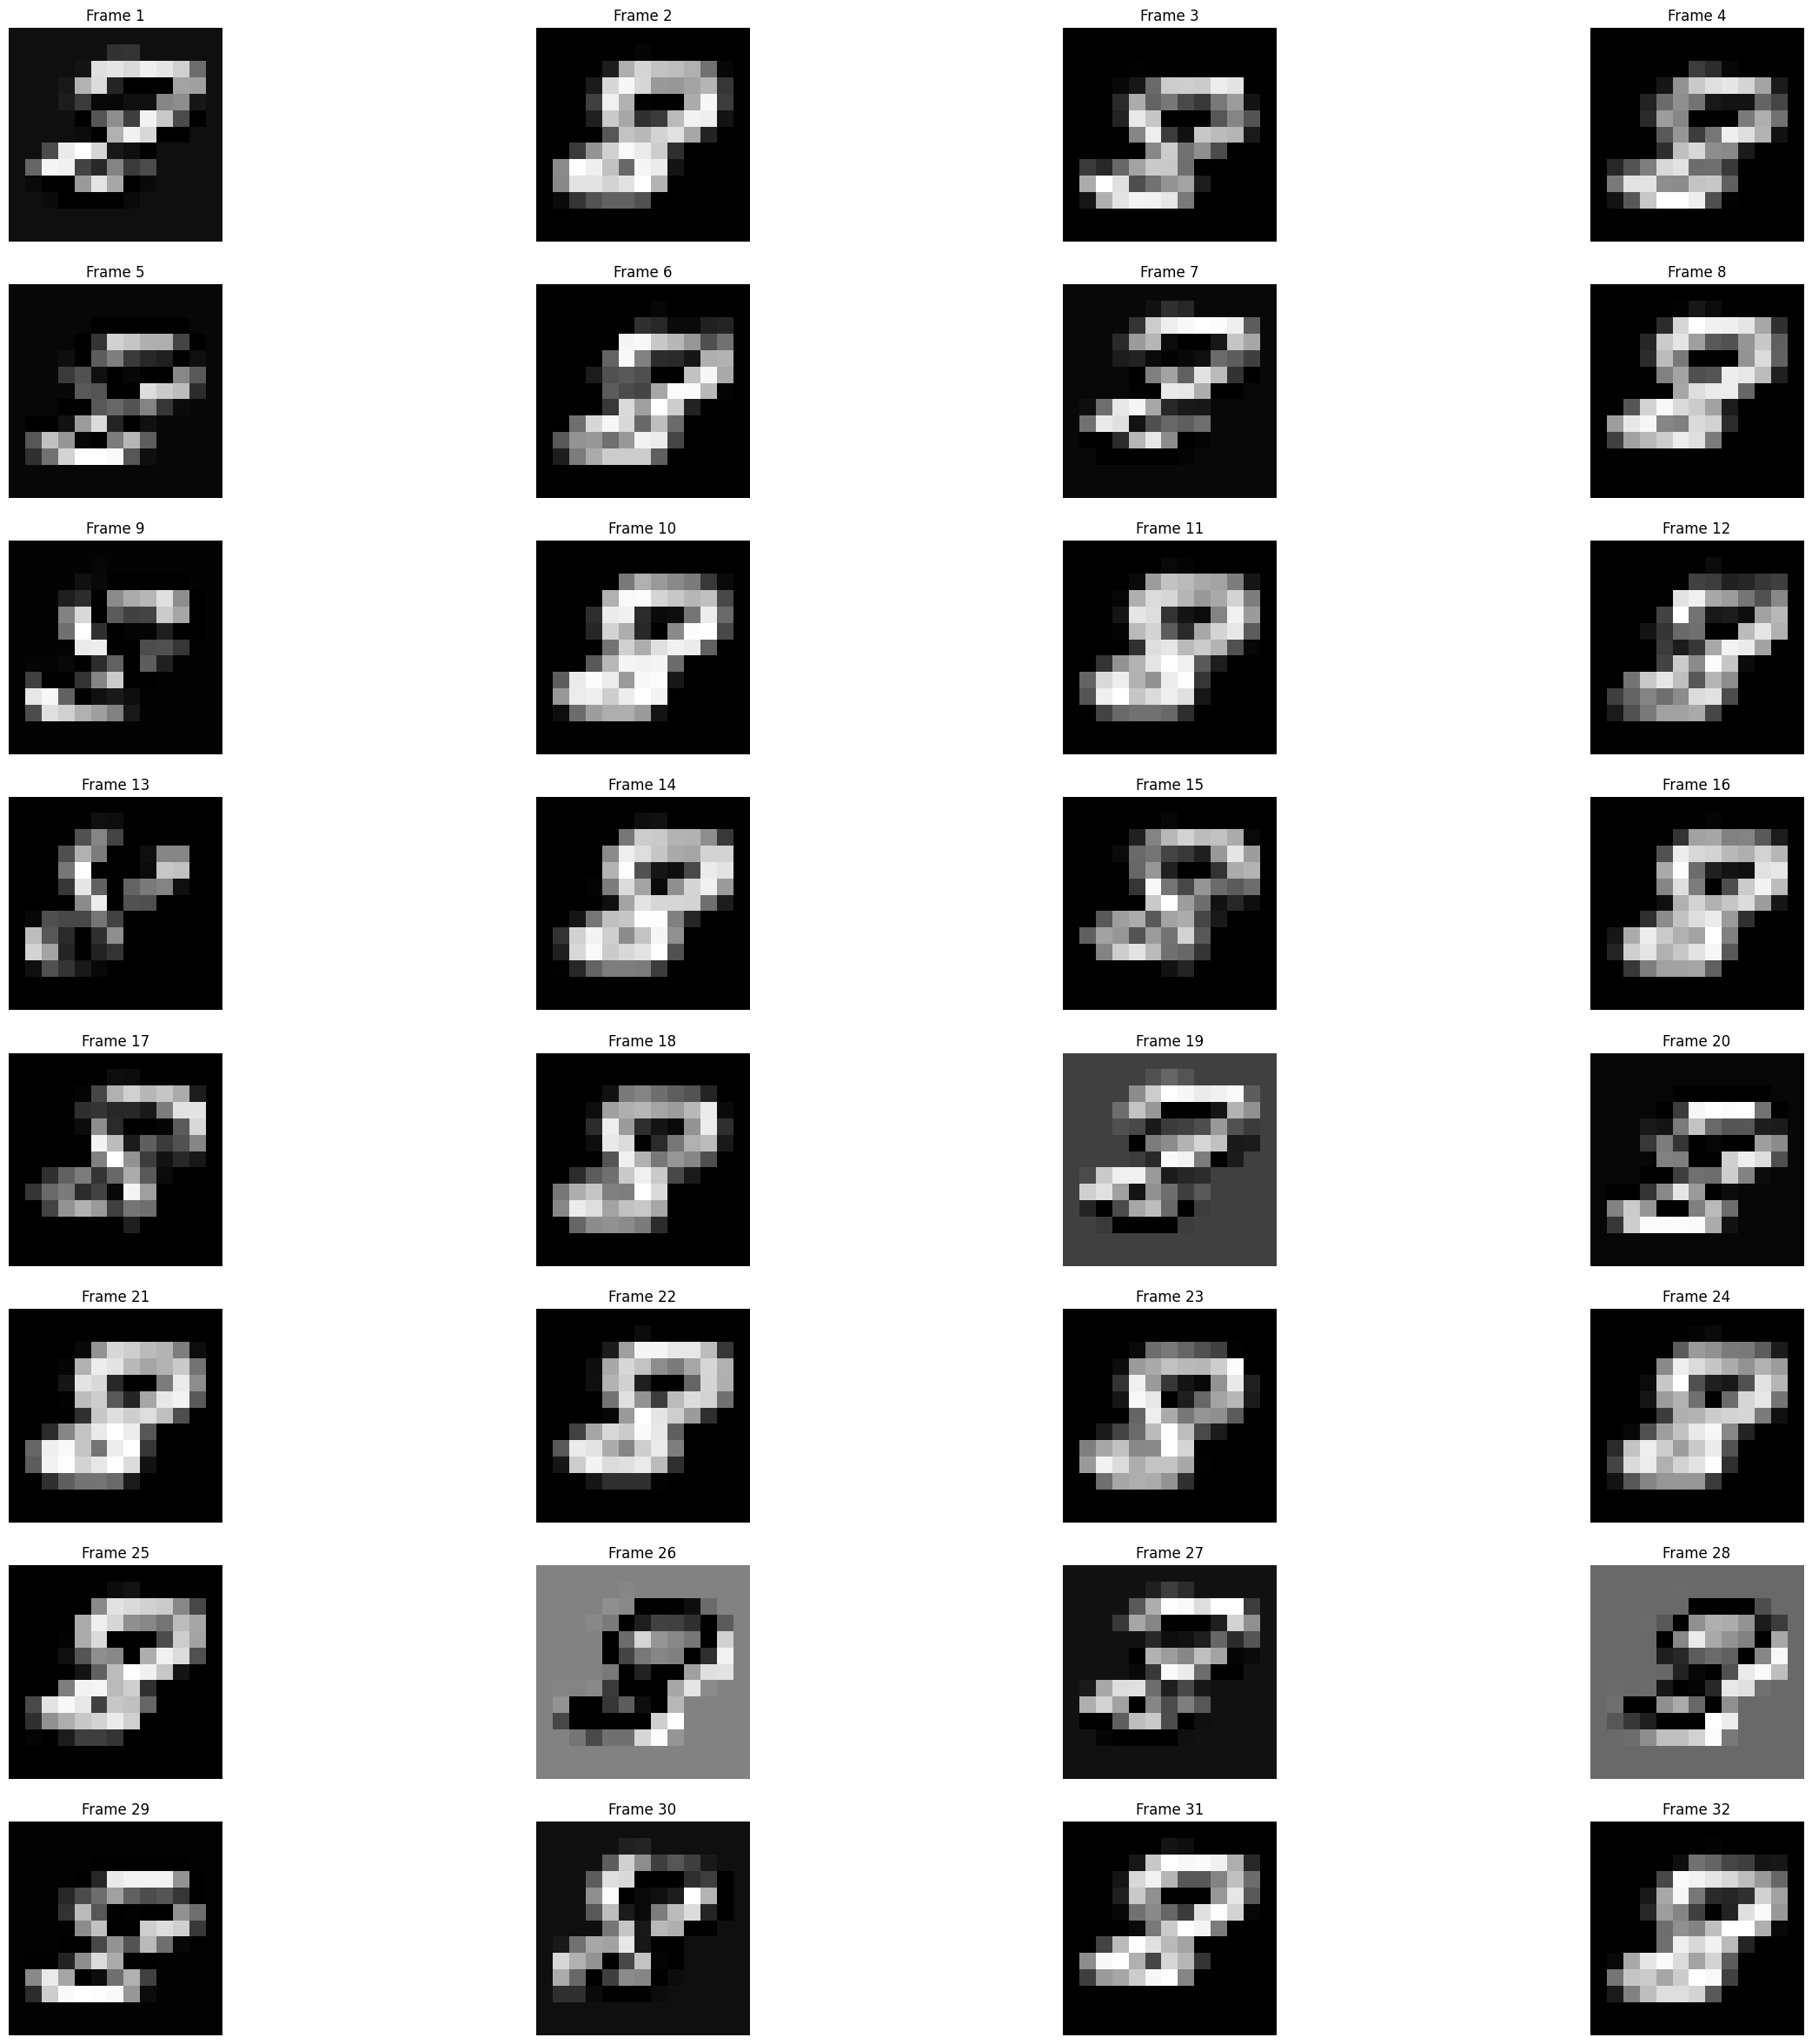

1/1 [==============================] - 0s 58ms/step


<ipython-input-64-758849a7c052>:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


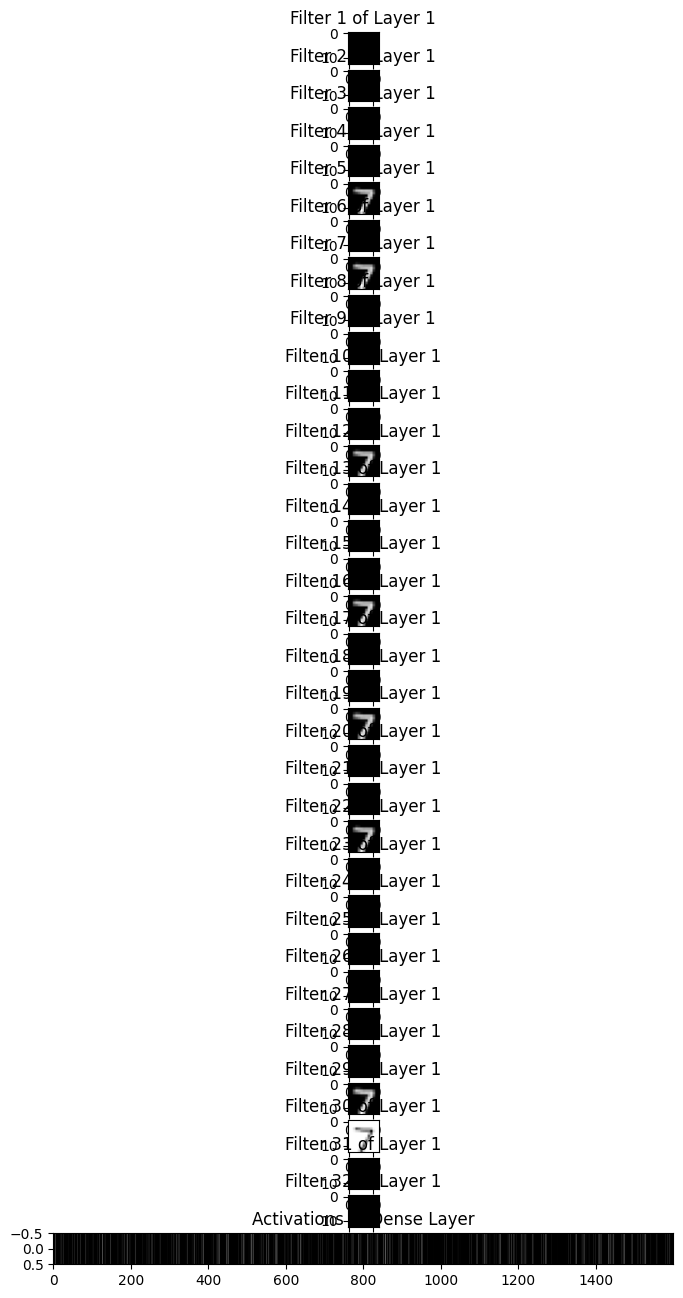

In [64]:

import tensorflow as tf
import matplotlib.pyplot as plt
layer_1_output = model.layers[1].output
layer_2_output = model.layers[3].output

visualization_model = tf.keras.models.Model(inputs=model.input, outputs=[layer_1_output, layer_2_output])
layer_1_output, layer_2_output = visualization_model.predict(X_test[0].reshape(1, 28, 28, 1))

num_filters_layer_1 = layer_1_output.shape[-1]
num_neurons_layer_2 = layer_2_output.shape[-1]


fig, axes = plt.subplots(num_filters_layer_1 + 1, 1, figsize=(8, 16))


for i in range(num_filters_layer_1):
    axes[i].imshow(layer_1_output[0, :, :, i], cmap='gray')
    axes[i].set_title(f'Filter {i+1} of Layer 1')
axes[num_filters_layer_1].imshow(layer_2_output.reshape(1, -1), cmap='gray', aspect='auto')
axes[num_filters_layer_1].set_title('Activations of Dense Layer')

plt.tight_layout()
plt.show()


**Output of the third convolution layer.**

In [ ]:
#ENTER YOUR CODE HERE

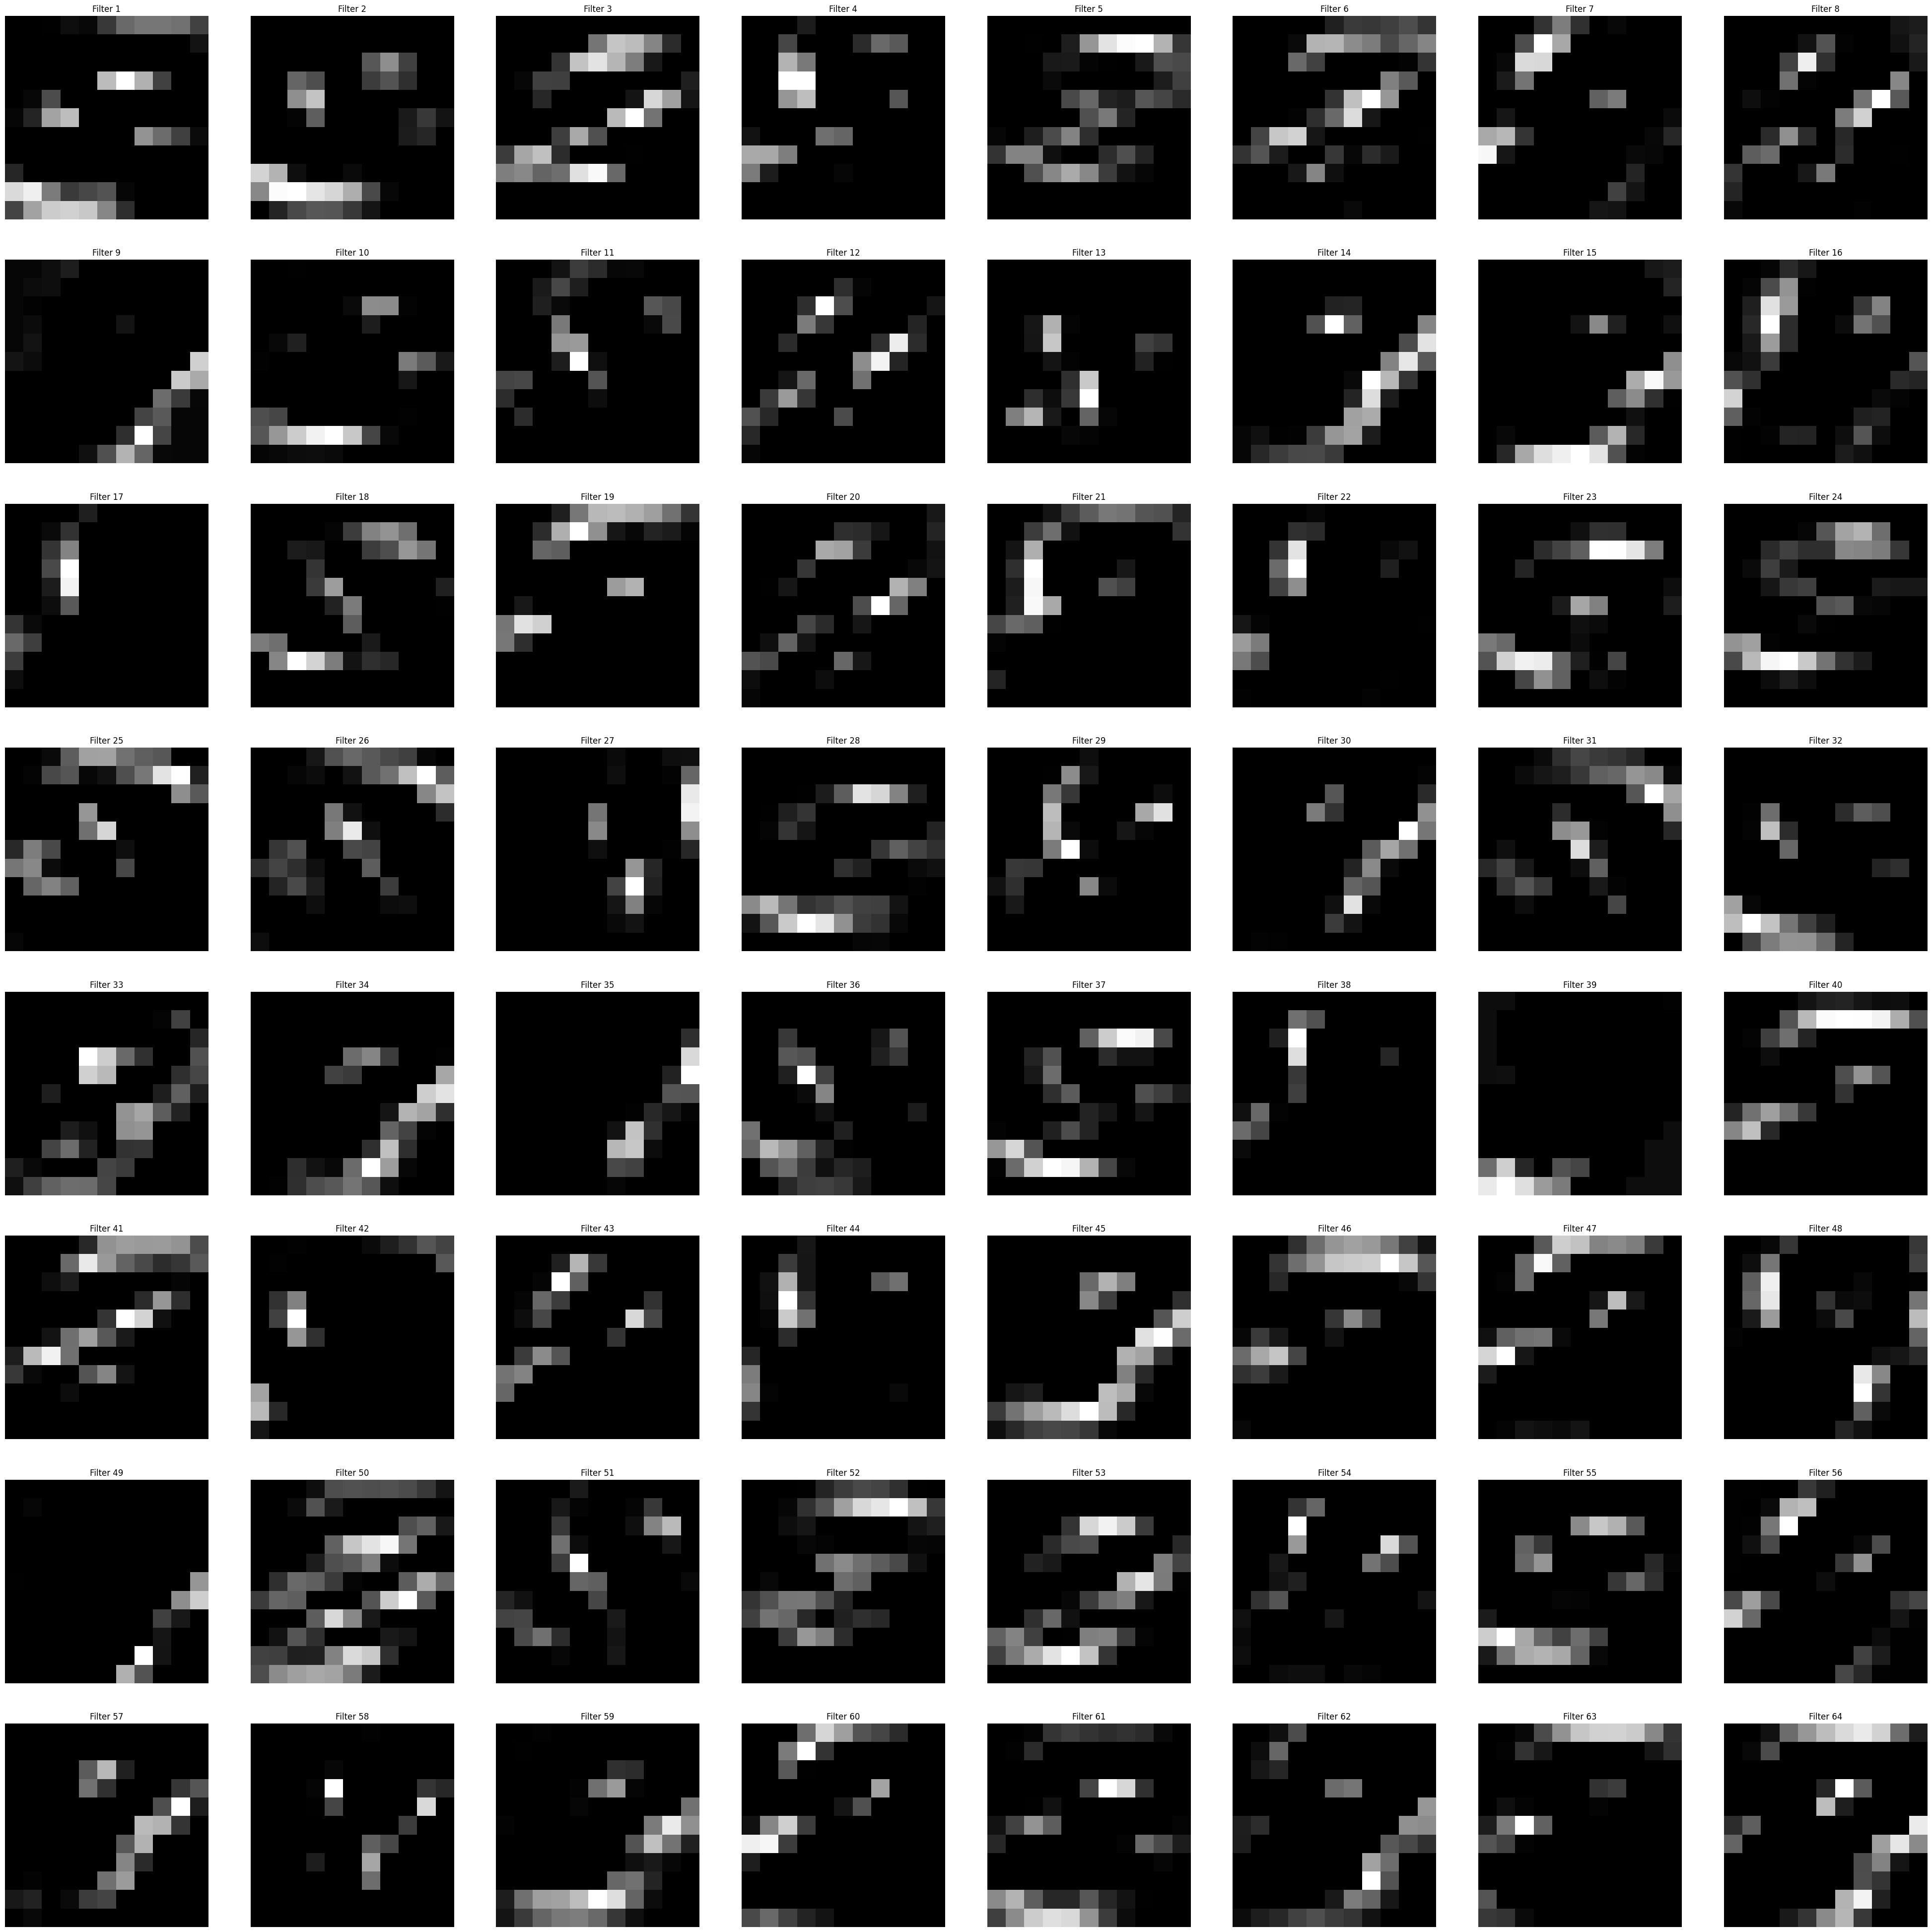

**It is now clearly visible that the each filter is extracting a particular feature.**

1/1 [==============================] - 0s 61ms/step


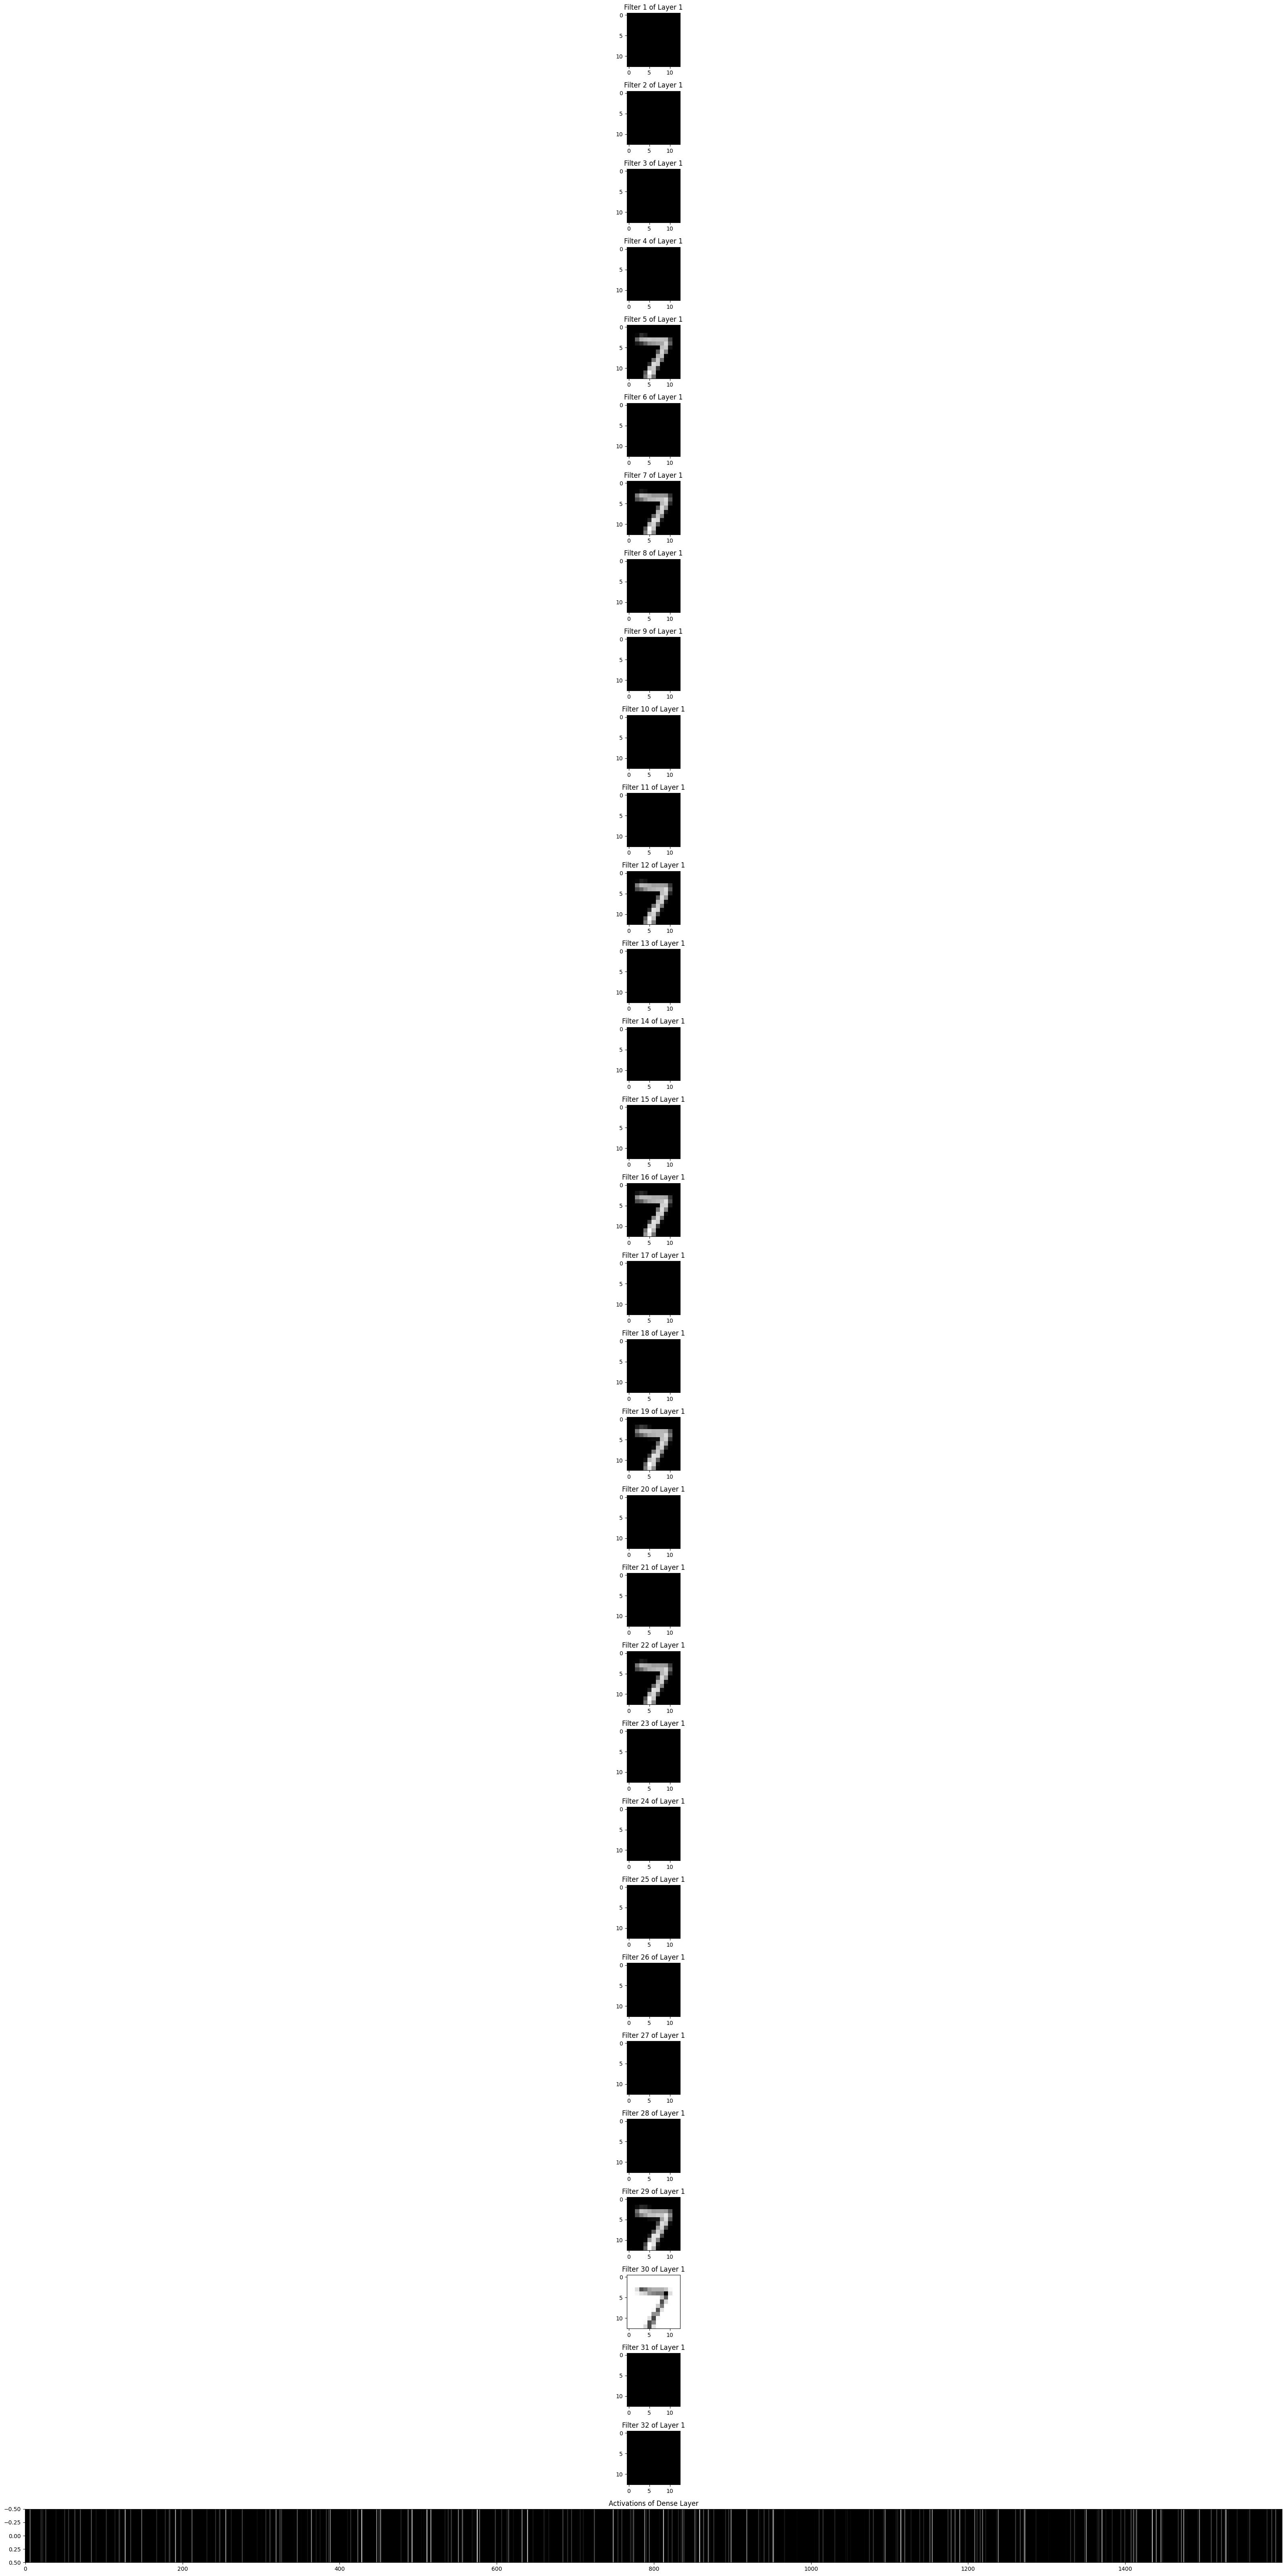

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt

layer_1_output = model.layers[1].output
layer_2_output = model.layers[3].output

visualization_model = tf.keras.models.Model(inputs=model.input, outputs=[layer_1_output, layer_2_output])
layer_1_output, layer_2_output = visualization_model.predict(X_test[0].reshape(1, 28, 28, 1))

num_filters_layer_1 = layer_1_output.shape[-1]
num_neurons_layer_2 = layer_2_output.shape[-1]


fig, axes = plt.subplots(num_filters_layer_1 + 1, 1, figsize=(32, 64))
for i in range(num_filters_layer_1):
    axes[i].imshow(layer_1_output[0, :, :, i], cmap='gray')
    axes[i].set_title(f'Filter {i+1} of Layer 1')

axes[num_filters_layer_1].imshow(layer_2_output.reshape(1, -1), cmap='gray', aspect='auto')
axes[num_filters_layer_1].set_title('Activations of Dense Layer')

plt.tight_layout()
plt.show()